# Data Wrangling Project

In [193]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

> ### Twitter Enhanced Archive

In [185]:
archive=pd.read_csv('twitter-archive-enhanced.csv')
archive.head()
tweet_id=archive['tweet_id']
archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> ### image_predictions.tsv

In [163]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)

In [165]:
with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [186]:
predictions = pd.read_csv('image_predictions.tsv', sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> ### tweet_json.txt

In [197]:
#import tweepy
#
#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''
#
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#
#api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [198]:
#txt_file=open('tweet_json.txt','w')
#del_tweets=[] #deleted tweets
#txt_file.write('tweet_id retweet_count favorite_count''\n')
#for twid in tweet_id:
#    try:
#        retweet_count=api.get_status(twid, tweet_mode='extended').retweet_count
#        favorite_count=api.get_status(twid,tweet_mode='extended').favorite_count
#        txt_file.write('{} {} {}\n'.format(twid,retweet_count,favorite_count))
#        
#    except Exception as e:
#        del_tweets.append(twid)
#txt_file.close()        
#   

Rate limit reached. Sleeping for: 762
Rate limit reached. Sleeping for: 741
Rate limit reached. Sleeping for: 752
Rate limit reached. Sleeping for: 751
Rate limit reached. Sleeping for: 758


In [187]:
stats=pd.read_csv('tweet_json.txt',sep=' ')
stats.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8199,37617
1,892177421306343426,6065,32326
2,891815181378084864,4011,24354
3,891689557279858688,8355,40935
4,891327558926688256,9054,39144


> ### Combining all sources into Master DataFrame

In [310]:
#combining data from all sources
master=pd.merge((pd.merge(archive,predictions, on='tweet_id', how='outer')),stats,on='tweet_id',how='outer')
master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8199.0,37617.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6065.0,32326.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4011.0,24354.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8355.0,40935.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9054.0,39144.0


## Data Assessment & Cleaning

In [284]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [285]:
master.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2337.000000,2337.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,2883.629012,7859.192555
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,4871.380310,12180.511332
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,580.000000,1367.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,1348.000000,3422.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,3359.000000,9633.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,82628.000000,162466.000000


In [286]:
#Unique records in each column
master.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
jpg_url                       2009
img_num                          4
p1                             378
p1_conf                       2006
p1_dog                           2
p2                             405
p2_conf                       2004
p2_dog                           2
p3                             408
p3_conf                       2006
p3_dog                           2
retweet_count       

Text(0.5, 1.0, 'Nulls in each Column')

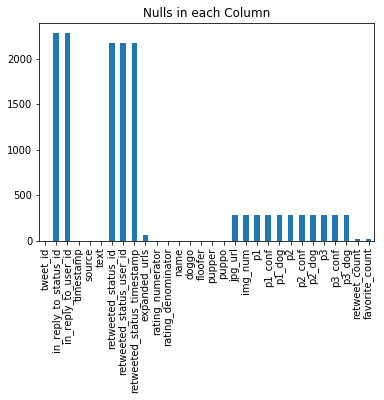

In [194]:
# Number of blanks in each column
master.isna().sum().plot(kind='bar')
plt.title('Nulls in each Column')

In [323]:
#creating copy of master data frame before cleaning
master1=master.copy()

> ### Quality Issue 1
> The column p1_conf gives the probability of the prediction being right and it is the highest probability for each row. This row sometimes predicts an item that isnt a dog. We will count the number of such records present and remove those.

In [324]:
#coding
print('Number of Records not predicted as dogs :',(master1['p1_dog']==False).sum())# Number of Items not predicted as dog
master1=master1.drop(master1.index[master1['p1_dog']==False])

Number of Records not predicted as dogs : 543


In [325]:
#testing
print('Number of Records not predicted as dogs :',(master1['p1_dog']==False).sum())


Number of Records not predicted as dogs : 0


> ### Quality Issue 2
> Rating Denominator has values other than 10. We will replace all denominators with 10.

In [326]:
#coding
print('Number of records with denominator other than 10 :',(master1['rating_denominator']!=10).sum()) # Number of records with denominator other than 10


Number of records with denominator other than 10 : 20


In [327]:
#cleaning
master1['rating_denominator']=10

In [328]:
#testing
print('Number of records with denominator other than 10 :',(master1['rating_denominator']!=10).sum())

Number of records with denominator other than 10 : 0


> ### Quality Issue 3
> Some Dog Names are wrong. If a dog's name starts with a lower case letter, then it is most probably a wrong name.

In [331]:
#coding

#making a list of binary variables indicating if its a name or not
names=[]
for name in master1['name']:
    if name=='None':
        names.append(0)
    elif name[0].islower():
        names.append(0)
    else:
        names.append(1)
#adding the binary column to master dataframe        
master1['isname']=names

print('Number of Wrong Names :',(master1['isname']==0).sum())



Number of Wrong Names : 626


In [332]:
#cleaning
# replacing None and non name values with blank space
for i in master1.index:
    if master1['name'][i]=='None':
        master1['name'][i]=' '
    
    elif master1['isname'][i]==0:
        master1['name'][i]=' '

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [333]:
# testing

master1[['name','isname']]

,name,isname
1,Tilly,1
2,Archie,1
4,Franklin,1
5,,0
6,Jax,1
7,,0
8,Zoey,1
9,Cassie,1
10,Koda,1
11,Bruno,1


> ### Quality Issue 4
> The values in timestamp end with 0000 which is unnecessary


In [334]:
#coding
master1['timestamp']=master1['timestamp'].astype(str)
master1['timestamp']=master1['timestamp'].str.split('+')
master1['timestamp']=master1['timestamp'].str.get(0)

In [335]:
#testing
master1['timestamp']

1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
4       2017-07-29 16:00:24 
5       2017-07-29 00:08:17 
6       2017-07-28 16:27:12 
7       2017-07-28 00:22:40 
8       2017-07-27 16:25:51 
9       2017-07-26 15:59:51 
10      2017-07-26 00:31:25 
11      2017-07-25 16:11:53 
12      2017-07-25 01:55:32 
13      2017-07-25 00:10:02 
14      2017-07-24 17:02:04 
15      2017-07-24 00:19:32 
16      2017-07-23 00:22:39 
17      2017-07-22 16:56:37 
18      2017-07-22 00:23:06 
19      2017-07-21 01:02:36 
20      2017-07-20 16:49:33 
21      2017-07-19 16:06:48 
23      2017-07-19 00:47:34 
24      2017-07-18 16:08:03 
25      2017-07-18 00:07:08 
26      2017-07-17 16:17:36 
27      2017-07-16 23:58:41 
29      2017-07-15 23:25:31 
30      2017-07-15 16:51:35 
31      2017-07-15 16:17:19 
32      2017-07-15 02:45:48 
33      2017-07-14 22:10:11 
                ...         
2317    2015-11-17 15:51:26 
2318    2015-11-17 03:16:00 
2319    2015-11-17 02:46:43 
2320    2015-1

> ### Quality Issue 5
> Bad Data type for column timestamp



In [336]:
#coding
print('timestamp data type :',master1['timestamp'].dtype)
master1['timestamp']=pd.to_datetime(master1['timestamp'])

timestamp data type : object


In [299]:
#testing
print('timestamp data type :',master1['timestamp'].dtype)

timestamp data type : datetime64[ns]


> ### Quality Issue 6
> Not all tweets have images


In [300]:
#coding
print('Number of records without images :',master1['img_num'].isna().sum())

Number of records without images : 281


In [301]:
#cleaning
master1=master1.drop(master1.index[master1['img_num'].isna()])

In [302]:
#testing
print('Number of records without images :',master1['img_num'].isna().sum())

Number of records without images : 0


> ### Quality Issue 7
> Text Column has multiple url's which are better if segregated

In [338]:
#coding
#extracting multiple url from text column
nrm=[]
for i in master1['text']:
    try:
        nrm.append(str(i[i.index('https'):len(i)]))
    except Exception as e:
        nrm.append(' ')

master1['tweet_url']=nrm


In [339]:
#cleaning

#Remove URL from the text and put into seperate column
master1['text']=master['text'].str.split('https').str.get(0) 
master1['tweet_url_1']= master1['tweet_url'].str.split(' ').str.get(0) #getting tweeturl 1
master1['tweet_url_2']= master1['tweet_url'].str.split(' ').str.get(1) #getting tweet url 2
master1['tweet_url_2']=master1['tweet_url_2'].fillna(' ') #filling blank url with space



In [342]:
#testing
master1.drop('tweet_url',axis=1,inplace=True) #dropping original url colummn
master1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,isname,tweet_url_1,tweet_url_2
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,6065.0,32326.0,1,https://t.co/0Xxu71qeIV,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,4011.0,24354.0,1,https://t.co/wUnZnhtVJB,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,9054.0,39144.0,1,https://t.co/AtUZn91f7f,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.116317,True,Indian_elephant,0.076902,False,3004.0,19681.0,0,https://t.co/kQ04fDDRmh,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.199287,True,ice_lolly,0.193548,False,1987.0,11509.0,1,https://t.co/Zr4hWfAs1H,https://t.co/tVJBRMnhxl


> ### Quality Issue 8
expanded urls have multiple values, seperating them would be better

In [343]:
#coding

master1['expanded_urls']=master1['expanded_urls'].str.split(',')
master1['expanded_url1']=master1['expanded_urls'].str.get(0)
master1['expanded_url2']=master1['expanded_urls'].str.get(1)
master1['expanded_url3']=master1['expanded_urls'].str.get(2)

In [344]:
#cleaning


for i in master1.index:
    if master1['expanded_url1'][i]==master1['expanded_url2'][i] :
        master1['expanded_url2'][i]=np.nan
    if master1['expanded_url2'][i]==master1['expanded_url3'][i] :
        master1['expanded_url3'][i]=np.nan
    if master1['expanded_url1'][i]==master1['expanded_url3'][i] :
        master1['expanded_url3'][i]=np.nan
      

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [345]:
# testing
master1[['expanded_url1','expanded_url2','expanded_url3']]

,expanded_url1,expanded_url2,expanded_url3
1,https://twitter.com/dog_rates/status/892177421...,NaN,NaN
2,https://twitter.com/dog_rates/status/891815181...,NaN,NaN
4,https://twitter.com/dog_rates/status/891327558...,NaN,NaN
5,https://twitter.com/dog_rates/status/891087950...,NaN,NaN
6,https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913...,NaN
7,https://twitter.com/dog_rates/status/890729181...,NaN,NaN
8,https://twitter.com/dog_rates/status/890609185...,NaN,NaN
9,https://twitter.com/dog_rates/status/890240255...,NaN,NaN
10,https://twitter.com/dog_rates/status/890006608...,NaN,NaN
11,https://twitter.com/dog_rates/status/889880896...,NaN,NaN


> ### Tidiness Issue 1
> The Source column has links which is less readable, it consists of Iphone, Web client, Vine and Tweet Deck. If we convert it to that format, it is easy to read an analyze.

In [347]:
#coding
master1['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [350]:
#cleaning
master1['source']=master1['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Iphone')
master1['source']=master1['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Website')
master1['source']=master1['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine')
master1['source']=master1['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweet Deck')




In [354]:
#testing
print(master1['source'].unique())
master1['source']

['Iphone' 'Twitter Website' 'Vine' 'Tweet Deck']


1       Iphone
2       Iphone
4       Iphone
5       Iphone
6       Iphone
7       Iphone
8       Iphone
9       Iphone
10      Iphone
11      Iphone
12      Iphone
13      Iphone
14      Iphone
15      Iphone
16      Iphone
17      Iphone
18      Iphone
19      Iphone
20      Iphone
21      Iphone
23      Iphone
24      Iphone
25      Iphone
26      Iphone
27      Iphone
29      Iphone
30      Iphone
31      Iphone
32      Iphone
33      Iphone
         ...  
2317    Iphone
2318    Iphone
2319    Iphone
2320    Iphone
2321    Iphone
2323    Iphone
2324    Iphone
2325    Iphone
2327    Iphone
2328    Iphone
2329    Iphone
2331    Iphone
2332    Iphone
2335    Iphone
2336    Iphone
2339    Iphone
2340    Iphone
2341    Iphone
2342    Iphone
2343    Iphone
2344    Iphone
2345    Iphone
2346    Iphone
2348    Iphone
2350    Iphone
2351    Iphone
2352    Iphone
2353    Iphone
2354    Iphone
2355    Iphone
Name: source, Length: 1813, dtype: object

> ### Tidiness Issue 2
> From my preliminary assesment, it was found that few columns had high number of null values. in_reply_to_status_id and in_reply_to_user_id are two such columns. I will remove these two as they serve no purpose for our analysis.


In [355]:
#coding
master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1813 entries, 1 to 2355
Data columns (total 36 columns):
tweet_id                      1813 non-null int64
in_reply_to_status_id         69 non-null float64
in_reply_to_user_id           69 non-null float64
timestamp                     1813 non-null datetime64[ns]
source                        1813 non-null object
text                          1813 non-null object
retweeted_status_id           155 non-null float64
retweeted_status_user_id      155 non-null float64
retweeted_status_timestamp    155 non-null object
expanded_urls                 1754 non-null object
rating_numerator              1813 non-null int64
rating_denominator            1813 non-null int64
name                          1813 non-null object
doggo                         1813 non-null object
floofer                       1813 non-null object
pupper                        1813 non-null object
puppo                         1813 non-null object
jpg_url                 

In [357]:
#cleaning
master1 = master1.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [358]:
#testing
master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1813 entries, 1 to 2355
Data columns (total 34 columns):
tweet_id                      1813 non-null int64
timestamp                     1813 non-null datetime64[ns]
source                        1813 non-null object
text                          1813 non-null object
retweeted_status_id           155 non-null float64
retweeted_status_user_id      155 non-null float64
retweeted_status_timestamp    155 non-null object
expanded_urls                 1754 non-null object
rating_numerator              1813 non-null int64
rating_denominator            1813 non-null int64
name                          1813 non-null object
doggo                         1813 non-null object
floofer                       1813 non-null object
pupper                        1813 non-null object
puppo                         1813 non-null object
jpg_url                       1532 non-null object
img_num                       1532 non-null float64
p1                   

In [375]:
# writing to csv file 

master1.to_csv('twitter_archive_master.csv')

## Analysis

> ## Number of users across different sources

Text(0, 0.5, 'count')

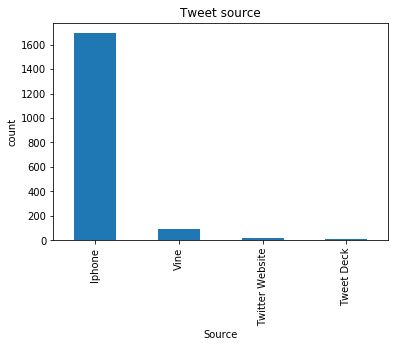

In [370]:
master1['source'].value_counts().plot(kind='bar')
plt.xlabel('Source')
plt.title('Tweet source')
plt.ylabel('count')

> From the above bar graph we can see that most users in our database access twitter through Iphones, and a few of them use vine (which was taken of long ago).

> ## Favorite counts by breed

Text(0, 0.5, 'Count')

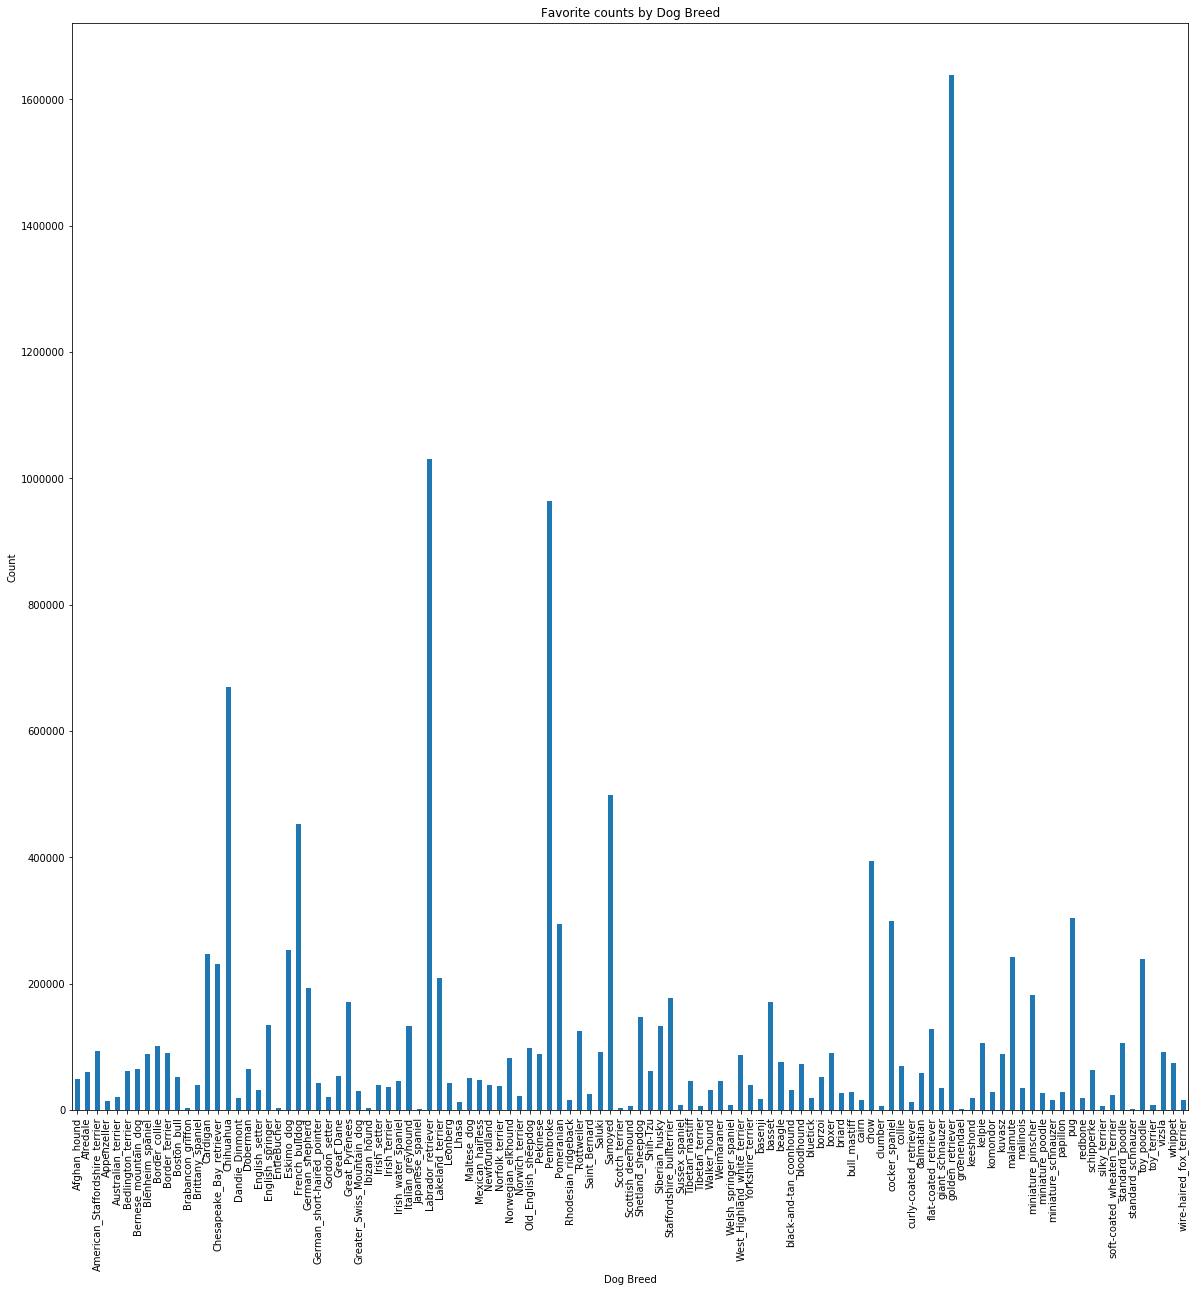

In [371]:
plt.figure(figsize=(20,20))
master1.groupby('p1').favorite_count.sum().plot(kind='bar')
plt.title('Favorite counts by Dog Breed')
plt.xlabel('Dog Breed')
plt.ylabel('Count')

> We can clearly see from the above bar chart that golden retreivers are the favorite choice with more than 1600000 likes. The second highest are labrador retreivers which are around 1000000.

> ## Dog Rating Distribution

Text(0, 0.5, 'Count')

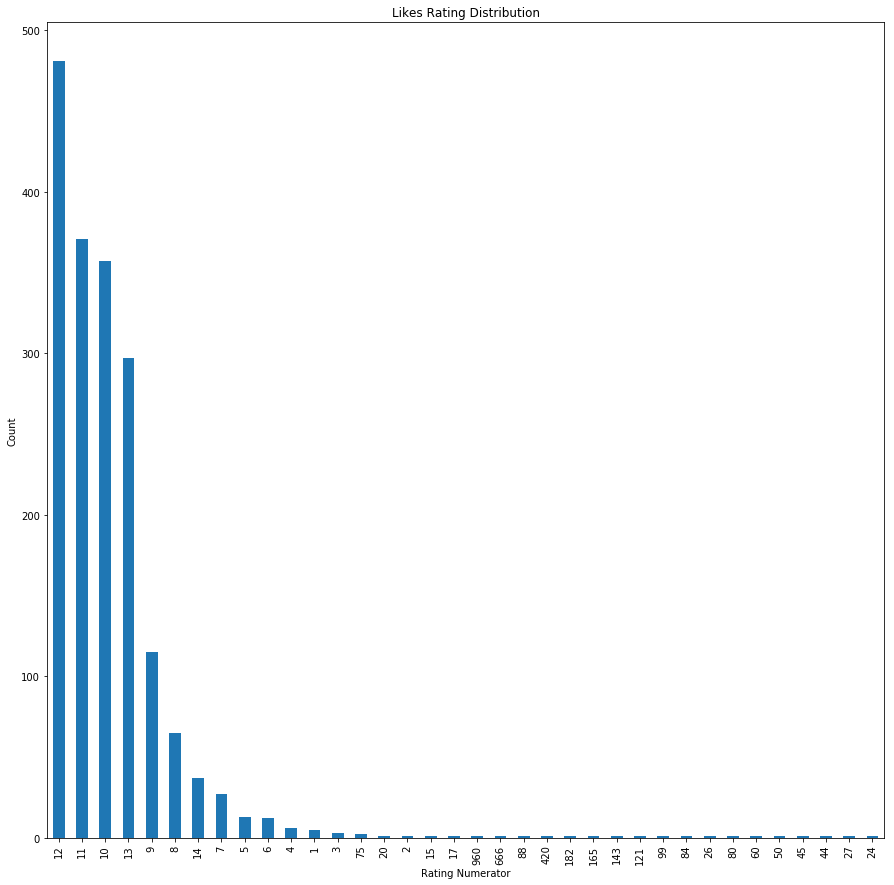

In [372]:
plt.figure(figsize=(15,15))
master1['rating_numerator'].value_counts().plot(kind='bar')
plt.title('Likes Rating Distribution')
plt.xlabel('Rating Numerator')
plt.ylabel('Count')

> We see that most dogs receive at least 12 on a 10 scale. People love dogs!